In [ ]:
%pip install mido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.6 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=7f64bfffbed4f82ac68d02c10154c221e1e934efab7c0a9e337be45789843e11
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [3]:
import pretty_midi
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import random

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/VLR/Dataset/EMOPIA_1.0/label.csv")
df1

,ID,4Q,annotator
0,Q1_0vLPYiPN7qY_0,1,D
1,Q1_0vLPYiPN7qY_1,1,D
2,Q1_0vLPYiPN7qY_2,1,D
3,Q1_1Qc15G0ZHIg_1,1,D
4,Q1_1Qc15G0ZHIg_2,1,D
...,...,...,...
1073,Q4_xgtwQGeB6_0_0,4,C
1074,Q4_xrhWli_R98g_0,4,C
1075,Q4_xrhWli_R98g_2,4,C
1076,Q4_yC0fAQxGgr0_0,4,C


<ipython-input-5-c8a5252455ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df1, x='4Q', y='annotator', inner='box', palette='Dark2')


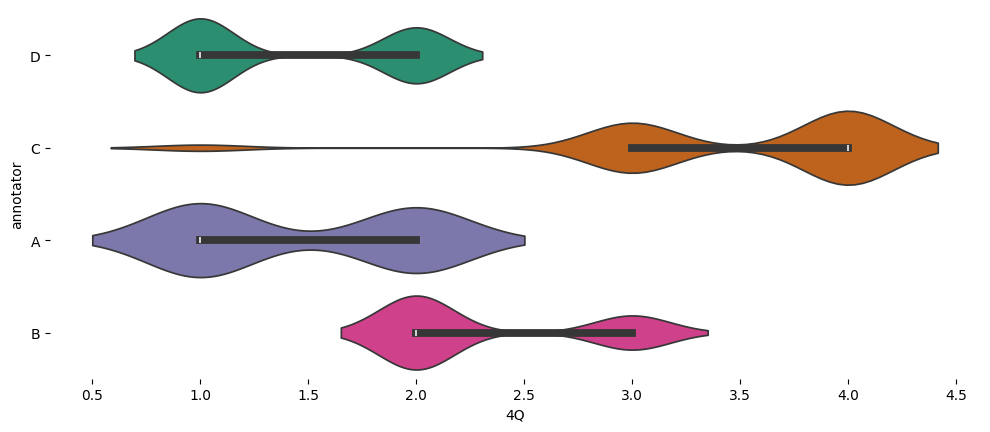

In [ ]:
figsize = (12, 1.2 * len(df1['annotator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='4Q', y='annotator', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

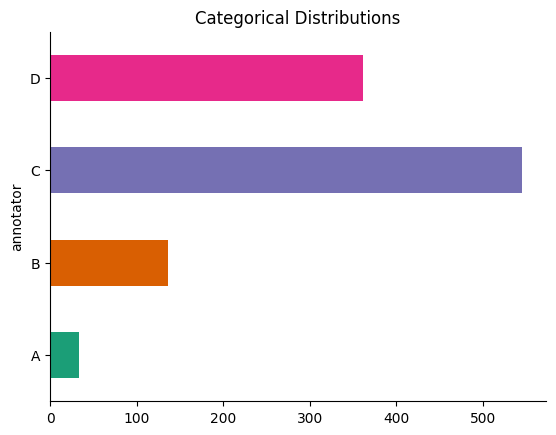

In [ ]:
plt.title("Categorical Distributions")
df1.groupby('annotator').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

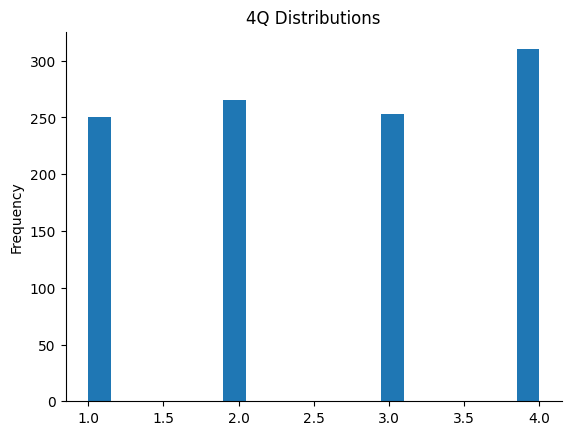

In [ ]:
df1['4Q'].plot(kind='hist', bins=20, title='4Q Distributions')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/VLR/Dataset/EMOPIA_1.0/metadata_by_song.csv")
df2

,songID,num_Q1,num_Q2,num_Q3,num_Q4,DominantQ
0,e8NQ2NH0nc8,2,0,0,0,1
1,HQ8ISDX6PiI,0,0,0,2,4
2,ZTrEoB8T9YA,0,3,0,0,2
3,3N2G21U7guk,3,0,0,4,4
4,_8v0MFBZoco,2,0,0,0,1
...,...,...,...,...,...,...
382,D8Ed5PZXfF4,0,0,1,0,3
383,Tjno89OVuRI,0,0,0,2,4
384,dtS02mrDMsM,0,5,0,0,2
385,_kJtgm1OUNA,3,0,0,0,1


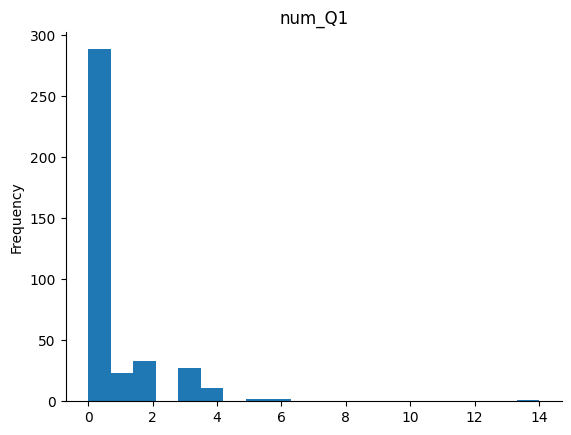

In [ ]:
df2['num_Q1'].plot(kind='hist', bins=20, title='num_Q1')
plt.gca().spines[['top', 'right',]].set_visible(False)

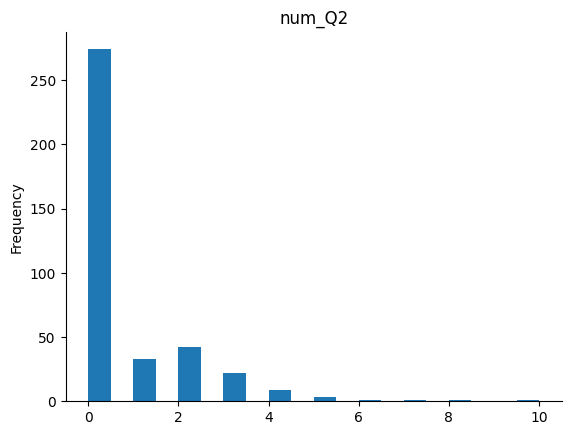

In [ ]:
df2['num_Q2'].plot(kind='hist', bins=20, title='num_Q2')
plt.gca().spines[['top', 'right',]].set_visible(False)

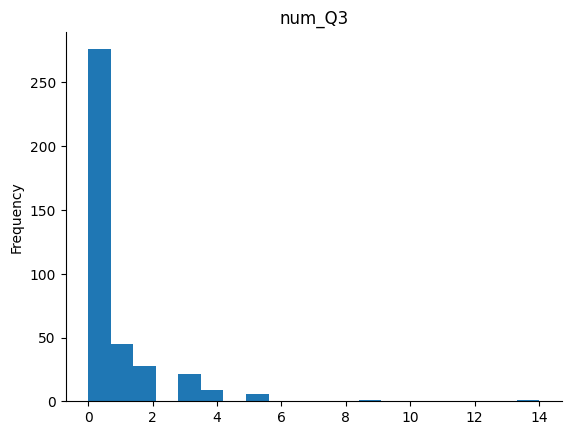

In [ ]:
df2['num_Q3'].plot(kind='hist', bins=20, title='num_Q3')
plt.gca().spines[['top', 'right',]].set_visible(False)

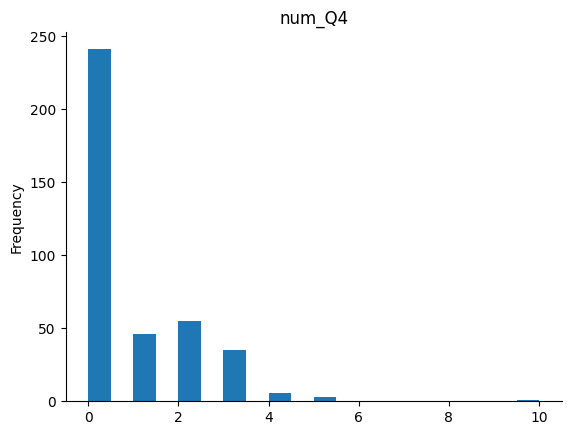

In [ ]:
df2['num_Q4'].plot(kind='hist', bins=20, title='num_Q4')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from collections import defaultdict

# Path to the folder containing MIDI files
midi_folder_path = '/content/drive/MyDrive/VLR/Dataset/EMOPIA_1.0/midis'

# Initialize a dictionary to count files with each label
label_counts = defaultdict(int)

# Iterate over files in the folder
for filename in os.listdir(midi_folder_path):
    # Check if the file is a MIDI file
    if filename.endswith('.mid') or filename.endswith('.midi'):
        # Check for each label in the filename and increment count if found
        if 'Q1' in filename:
            label_counts['Q1'] += 1
        elif 'Q2' in filename:
            label_counts['Q2'] += 1
        elif 'Q3' in filename:
            label_counts['Q3'] += 1
        elif 'Q4' in filename:
            label_counts['Q4'] += 1

# counts for each label
for label, count in label_counts.items():
    print(f"{label}: {count}")


for label in ['Q1', 'Q2', 'Q3', 'Q4']:
    if label not in label_counts:
        print(f"{label}: 0")


Q3: 253
Q1: 250
Q4: 310
Q2: 265


In [ ]:
# Define the path to the folder containing MIDI files
midi_folder_path = '/content/drive/MyDrive/VLR/Dataset/EMOPIA_1.0/midis'

# Loop through each file in the folder
for filename in os.listdir(midi_folder_path):
    if filename.endswith('.mid') or filename.endswith('.midi'):  # Check if it's a MIDI file
        midi_file_path = os.path.join(midi_folder_path, filename)

        # Load the MIDI file using pretty_midi
        try:
            midi_data = pretty_midi.PrettyMIDI(midi_file_path)
            print(f"Processing: {filename}")

            # Loop through all instruments in the MIDI file
            for instrument in midi_data.instruments:
                if not instrument.is_drum:  # Skip drum tracks if not needed
                    print(f"  Instrument: {instrument.name}")

                    # Loop through all notes in the instrument
                    for note in instrument.notes:
                        print(f"    Pitch: {note.pitch}, Velocity: {note.velocity}, Start: {note.start}, End: {note.end}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


Streaming output truncated to the last 5000 lines.
    Pitch: 80, Velocity: 104, Start: 23.752604166666664, End: 24.786458333333332
    Pitch: 68, Velocity: 96, Start: 24.494791666666664, End: 24.787760416666664
    Pitch: 79, Velocity: 105, Start: 24.493489583333332, End: 24.7890625
    Pitch: 59, Velocity: 96, Start: 24.2421875, End: 24.7890625
    Pitch: 86, Velocity: 101, Start: 23.748697916666664, End: 24.7890625
    Pitch: 76, Velocity: 109, Start: 24.240885416666664, End: 24.790364583333332
    Pitch: 71, Velocity: 94, Start: 24.2421875, End: 24.799479166666664
    Pitch: 81, Velocity: 108, Start: 24.733072916666664, End: 24.803385416666664
    Pitch: 69, Velocity: 105, Start: 24.731770833333332, End: 24.8046875
    Pitch: 72, Velocity: 108, Start: 24.979166666666664, End: 25.479166666666664
    Pitch: 76, Velocity: 106, Start: 24.983072916666664, End: 25.479166666666664
    Pitch: 84, Velocity: 102, Start: 24.98046875, End: 25.479166666666664
    Pitch: 57, Velocity: 97, Start:

In [4]:
# Folder containing MIDI files
midi_folder_path = '/content/drive/MyDrive/VLR/Dataset/EMOPIA_1.0/midis'

# Define target sequence length
target_length = 100  # Set this to your desired length

# Define a function to calculate time step based on tempo and note division (e.g., 1/16 note)
def calculate_time_step(tempo_bpm, note_division=16):
    beat_duration = 60.0 / tempo_bpm
    time_step = beat_duration / (note_division / 4)  # For 1/16 note, use note_division=16
    return time_step

# Function to convert MIDI file to sequence with dynamically set time step and normalized velocities
def midi_to_sequence_with_dynamic_timestep(midi_file_path, note_division=16):
    midi_data = pretty_midi.PrettyMIDI(midi_file_path)
    tempo_changes = midi_data.get_tempo_changes()
    if len(tempo_changes[0]) > 1:
        tempo = np.mean(tempo_changes[1])
    else:
        tempo = tempo_changes[1][0]

    time_step = calculate_time_step(tempo, note_division)
    total_time = midi_data.get_end_time()
    sequence = []

    for time in np.arange(0, total_time, time_step):
        note_vector = np.zeros(128)
        for instrument in midi_data.instruments:
            if not instrument.is_drum:
                for note in instrument.notes:
                    if note.start <= time < note.end:
                        normalized_velocity = note.velocity / 127.0
                        note_vector[note.pitch] = normalized_velocity
        sequence.append(note_vector)

    return np.array(sequence)



# Initialize a dictionary to store processed sequences by label
processed_sequences_by_label = {
    'Q1': [],
    'Q2': [],
    'Q3': [],
    'Q4': []
}

# Process MIDI files in the folder
for filename in os.listdir(midi_folder_path):
    if filename.endswith('.mid') or filename.endswith('.midi'):
        label = filename.split('_')[0]  # Assumes the label is the prefix, like 'Q1'

        if label in processed_sequences_by_label:
            midi_file_path = os.path.join(midi_folder_path, filename)

            try:
                # Convert MIDI file to sequence with dynamic time step
                sequence = midi_to_sequence_with_dynamic_timestep(midi_file_path, note_division=16)
                print(f"Original sequence shape for {filename}: {sequence.shape}")

                # Add to the dictionary by label
                processed_sequences_by_label[label].append(sequence)

            except Exception as e:
                print(f"Error processing {filename}: {e}")


Original sequence shape for Q3_uj3Gif77SYM_1.mid: (236, 128)
Original sequence shape for Q1_e8NQ2NH0nc8_1.mid: (240, 128)
Original sequence shape for Q4_XPLYvpyfKUM_1.mid: (240, 128)
Original sequence shape for Q2_61EA0xRX8gE_1.mid: (315, 128)
Original sequence shape for Q4_heBmBQDWj-M_0.mid: (315, 128)
Original sequence shape for Q4_UpHutdJvZMI_0.mid: (240, 128)
Original sequence shape for Q2_WBxql6cuU7c_0.mid: (394, 128)
Original sequence shape for Q3_X1p8xcarVu0_2.mid: (233, 128)
Original sequence shape for Q3_fuCxYrru2S4_0.mid: (556, 128)
Original sequence shape for Q4_UpHutdJvZMI_1.mid: (260, 128)
Original sequence shape for Q4_XPLYvpyfKUM_0.mid: (240, 128)
Original sequence shape for Q4_iXiSFSGws-c_1.mid: (320, 128)
Original sequence shape for Q3_Ie5koh4qvJc_5.mid: (296, 128)
Original sequence shape for Q4_d_49EtXDMFE_1.mid: (300, 128)
Original sequence shape for Q2_Uu-oRTRT6uQ_0.mid: (302, 128)
Original sequence shape for Q4_bfopzItCYrE_2.mid: (296, 128)
Original sequence shape 

In [37]:
# Dictionary to store train, validation, and test splits by label
train_sequences_by_label = {}
val_sequences_by_label = {}
test_sequences_by_label = {}

for label, sequences in processed_sequences_by_label.items():
    # Determine the number of sequences for the current label
    num_sequences = len(sequences)

    # Shuffle the sequences
    np.random.shuffle(sequences)

    # Calculate split indices
    train_size = int(0.8 * num_sequences)
    val_size = int(0.1 * num_sequences)

    # Split the data for this label
    train_sequences_by_label[label] = sequences[:train_size]
    val_sequences_by_label[label] = sequences[train_size:train_size + val_size]
    test_sequences_by_label[label] = sequences[train_size + val_size:]

    # Output the shapes of the splits for this label
    print(f"Label {label} - Train sequences: {len(train_sequences_by_label[label])}")
    print(f"Label {label} - Validation sequences: {len(val_sequences_by_label[label])}")
    print(f"Label {label} - Test sequences: {len(test_sequences_by_label[label])}")


Label Q1 - Train sequences: 200
Label Q1 - Validation sequences: 25
Label Q1 - Test sequences: 25
Label Q2 - Train sequences: 212
Label Q2 - Validation sequences: 26
Label Q2 - Test sequences: 27
Label Q3 - Train sequences: 202
Label Q3 - Validation sequences: 25
Label Q3 - Test sequences: 26
Label Q4 - Train sequences: 248
Label Q4 - Validation sequences: 31
Label Q4 - Test sequences: 31


In [ ]:
%pip install torch

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [38]:
#tips: save as pth instead of pkl
#define attention
class Attention(nn.Module):
    def __init__(self, lstm_output_size):
        super(Attention, self).__init__()
        self.attention = nn.Linear(lstm_output_size, 1)

    def forward(self, lstm_output):
        # lstm_output shape: [batch_size, seq_length, lstm_output_size]
        attention_weights = torch.softmax(self.attention(lstm_output), dim=1)  # [batch_size, seq_length, 1]
        attended_output = torch.sum(attention_weights * lstm_output, dim=1)   # [batch_size, lstm_output_size]
        return attended_output

class LSTMWithAttention(nn.Module):
    def __init__(self, input_dim, lstm_hidden_size, output_dim, num_layers=1, bidirectional=False, dropout=0.5):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=lstm_hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if num_layers > 1 else 0
        )
        # Calculate LSTM output size
        lstm_output_size = lstm_hidden_size * (2 if bidirectional else 1)
        self.attention = Attention(lstm_output_size)
        self.fc = nn.Linear(lstm_output_size, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: [batch_size, seq_length, input_dim]
        print(f"Model Forward: Input shape: {x.shape}")  # Debugging

        lstm_out, (hn, cn) = self.lstm(x)
        print(f"After LSTM: {lstm_out.shape}")  # Debugging

        attended_output = self.attention(lstm_out)
        print(f"After Attention: {attended_output.shape}")  # Debugging

        out = self.dropout(attended_output)
        out = self.fc(out)
        print(f"Output shape: {out.shape}")  #Debugging

        return out


In [39]:
#training loop
#CE Loss for now, might need to change later
#check note range to set as input_dim, currently set to 128

# Model parameters
input_dim = 128  # Feature dimension from MIDI
lstm_hidden_size = 256
output_dim = 4   # Example: number of classes, replace with actual
num_layers = 2
bidirectional = True
dropout = 0.5
learning_rate = 0.00001
batch_size = 64
num_epochs = 50

In [40]:
# Model initialization
# Initialize the model
model = LSTMWithAttention(
    input_dim=input_dim,
    lstm_hidden_size=lstm_hidden_size,
    output_dim=output_dim,
    num_layers=num_layers,
    bidirectional=bidirectional,
    dropout=dropout
)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


All sequences shape after padding: torch.Size([862, 800, 128])
All sequences shape after padding: torch.Size([107, 880, 128])


Epoch 1/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:   7%|▋         | 1/14 [00:00<00:04,  2.80it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.22it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.24it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.23it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 1/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [1/100], Train Loss: 1.3888, Validation Loss: 1.3878
Current learning rate: 1e-05


Epoch 2/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:   7%|▋         | 1/14 [00:00<00:03,  3.37it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.26it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 2/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [2/100], Train Loss: 1.3866, Validation Loss: 1.3870
Current learning rate: 1e-05


Epoch 3/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:   7%|▋         | 1/14 [00:00<00:03,  3.43it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.31it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.28it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.24it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 3/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [3/100], Train Loss: 1.3865, Validation Loss: 1.3865
Current learning rate: 1e-05


Epoch 4/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:   7%|▋         | 1/14 [00:00<00:03,  3.30it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.20it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.17it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.17it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 4/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [4/100], Train Loss: 1.3858, Validation Loss: 1.3861
Current learning rate: 1e-05


Epoch 5/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:   7%|▋         | 1/14 [00:00<00:03,  3.28it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 5/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.24it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [5/100], Train Loss: 1.3857, Validation Loss: 1.3858
Current learning rate: 1e-05


Epoch 6/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.22it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.10it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 6/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [6/100], Train Loss: 1.3862, Validation Loss: 1.3854
Current learning rate: 1e-05


Epoch 7/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:   7%|▋         | 1/14 [00:00<00:03,  3.28it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.18it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 7/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [7/100], Train Loss: 1.3845, Validation Loss: 1.3850
Current learning rate: 1e-05


Epoch 8/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.10it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 8/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [8/100], Train Loss: 1.3844, Validation Loss: 1.3849
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 9/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 9/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [9/100], Train Loss: 1.3855, Validation Loss: 1.3845
Current learning rate: 1e-05


Epoch 10/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.10it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 10/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [10/100], Train Loss: 1.3858, Validation Loss: 1.3852
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 11/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 11/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [11/100], Train Loss: 1.3852, Validation Loss: 1.3837
Current learning rate: 1e-05


Epoch 12/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.19it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 12/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [12/100], Train Loss: 1.3838, Validation Loss: 1.3839
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 13/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training:  86%|████████▌ | 12/14 [00:04<00:00,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 13/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [13/100], Train Loss: 1.3836, Validation Loss: 1.3835
Current learning rate: 1e-05


Epoch 14/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  21%|██▏       | 3/14 [00:01<00:03,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  43%|████▎     | 6/14 [00:02<00:02,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  64%|██████▍   | 9/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training:  86%|████████▌ | 12/14 [00:04<00:00,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 14/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.09it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [14/100], Train Loss: 1.3840, Validation Loss: 1.3835
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 15/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  14%|█▍        | 2/14 [00:00<00:04,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  21%|██▏       | 3/14 [00:01<00:03,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  43%|████▎     | 6/14 [00:02<00:02,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  64%|██████▍   | 9/14 [00:03<00:01,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training:  86%|████████▌ | 12/14 [00:04<00:00,  2.93it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 15/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.05it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [15/100], Train Loss: 1.3834, Validation Loss: 1.3841
EarlyStopping counter: 2 out of 5
Current learning rate: 1e-05


Epoch 16/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  14%|█▍        | 2/14 [00:00<00:04,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  21%|██▏       | 3/14 [00:01<00:03,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  43%|████▎     | 6/14 [00:02<00:02,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  64%|██████▍   | 9/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training:  86%|████████▌ | 12/14 [00:04<00:00,  2.94it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 16/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [16/100], Train Loss: 1.3830, Validation Loss: 1.3820
Current learning rate: 1e-05


Epoch 17/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  14%|█▍        | 2/14 [00:00<00:04,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  21%|██▏       | 3/14 [00:01<00:03,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  2.95it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  43%|████▎     | 6/14 [00:02<00:02,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.96it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  64%|██████▍   | 9/14 [00:03<00:01,  2.97it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training:  86%|████████▌ | 12/14 [00:04<00:00,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 17/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [17/100], Train Loss: 1.3844, Validation Loss: 1.3820
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 18/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 18/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [18/100], Train Loss: 1.3826, Validation Loss: 1.3830
EarlyStopping counter: 2 out of 5
Current learning rate: 1e-05


Epoch 19/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 19/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [19/100], Train Loss: 1.3831, Validation Loss: 1.3829
EarlyStopping counter: 3 out of 5
Current learning rate: 1e-05


Epoch 20/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 20/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [20/100], Train Loss: 1.3833, Validation Loss: 1.3817
Current learning rate: 1e-05


Epoch 21/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.18it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 21/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [21/100], Train Loss: 1.3817, Validation Loss: 1.3811
Current learning rate: 1e-05


Epoch 22/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.21it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 22/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [22/100], Train Loss: 1.3827, Validation Loss: 1.3827
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 23/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.17it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 23/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [23/100], Train Loss: 1.3818, Validation Loss: 1.3812
EarlyStopping counter: 2 out of 5
Current learning rate: 1e-05


Epoch 24/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.24it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.10it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 24/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [24/100], Train Loss: 1.3824, Validation Loss: 1.3801
Current learning rate: 1e-05


Epoch 25/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 25/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [25/100], Train Loss: 1.3826, Validation Loss: 1.3824
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 26/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.14it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 26/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [26/100], Train Loss: 1.3829, Validation Loss: 1.3814
EarlyStopping counter: 2 out of 5
Current learning rate: 1e-05


Epoch 27/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.17it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 27/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [27/100], Train Loss: 1.3815, Validation Loss: 1.3793
Current learning rate: 1e-05


Epoch 28/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 28/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [28/100], Train Loss: 1.3810, Validation Loss: 1.3821
EarlyStopping counter: 1 out of 5
Current learning rate: 1e-05


Epoch 29/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.11it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 29/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [29/100], Train Loss: 1.3798, Validation Loss: 1.3827
EarlyStopping counter: 2 out of 5
Current learning rate: 1e-05


Epoch 30/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.16it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 30/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [30/100], Train Loss: 1.3821, Validation Loss: 1.3802
EarlyStopping counter: 3 out of 5
Current learning rate: 1e-05


Epoch 31/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.13it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.07it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 31/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [31/100], Train Loss: 1.3800, Validation Loss: 1.3794
EarlyStopping counter: 4 out of 5
Current learning rate: 1e-05


Epoch 32/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.09it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.04it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 32/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [32/100], Train Loss: 1.3797, Validation Loss: 1.3791
Current learning rate: 1e-05


Epoch 33/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 33/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [33/100], Train Loss: 1.3812, Validation Loss: 1.3819
EarlyStopping counter: 1 out of 5
Current learning rate: 2.0000000000000003e-06


Epoch 34/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.15it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.06it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.98it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  79%|███████▊  | 11/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 34/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [34/100], Train Loss: 1.3801, Validation Loss: 1.3791
EarlyStopping counter: 2 out of 5
Current learning rate: 2.0000000000000003e-06


Epoch 35/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.05it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.03it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  36%|███▌      | 5/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  57%|█████▋    | 8/14 [00:02<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  64%|██████▍   | 9/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 35/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [35/100], Train Loss: 1.3812, Validation Loss: 1.3805
EarlyStopping counter: 3 out of 5
Current learning rate: 2.0000000000000003e-06


Epoch 36/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  50%|█████     | 7/14 [00:02<00:02,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 36/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [36/100], Train Loss: 1.3801, Validation Loss: 1.3809
EarlyStopping counter: 4 out of 5
Current learning rate: 2.0000000000000003e-06


Epoch 37/100 Training:   0%|          | 0/14 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:   7%|▋         | 1/14 [00:00<00:04,  3.12it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  14%|█▍        | 2/14 [00:00<00:03,  3.08it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  21%|██▏       | 3/14 [00:00<00:03,  3.01it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  29%|██▊       | 4/14 [00:01<00:03,  3.02it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  36%|███▌      | 5/14 [00:01<00:03,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  43%|████▎     | 6/14 [00:01<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  50%|█████     | 7/14 [00:02<00:02,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  57%|█████▋    | 8/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  64%|██████▍   | 9/14 [00:02<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  71%|███████▏  | 10/14 [00:03<00:01,  2.99it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  79%|███████▊  | 11/14 [00:03<00:01,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training:  86%|████████▌ | 12/14 [00:03<00:00,  3.00it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])


Epoch 37/100 Training: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]


Model Forward: Input shape: torch.Size([30, 800, 128])
After LSTM: torch.Size([30, 800, 512])
After Attention: torch.Size([30, 512])
Output shape: torch.Size([30, 4])
Model Forward: Input shape: torch.Size([64, 880, 128])
After LSTM: torch.Size([64, 880, 512])
After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([43, 880, 128])
After LSTM: torch.Size([43, 880, 512])
After Attention: torch.Size([43, 512])
Output shape: torch.Size([43, 4])
Epoch [37/100], Train Loss: 1.3802, Validation Loss: 1.3810
EarlyStopping counter: 5 out of 5
Early stopping triggered. Training stopped.
Model and training history saved.


<ipython-input-40-3e88093b955a>:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


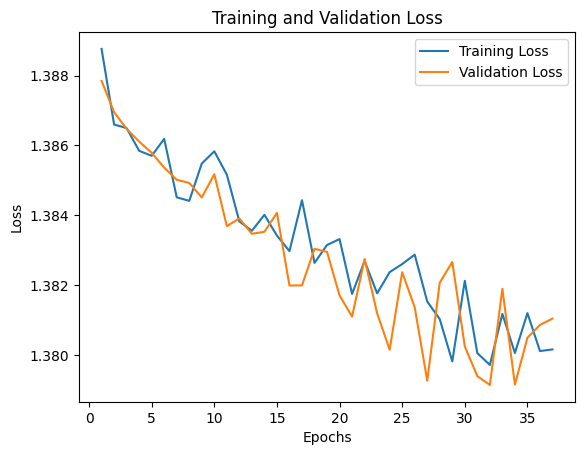

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0  # Reset the counter if validation loss improves
        else:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
# Initialize the optimizer with L2 regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4) # L2 regularization (weight decay)

# Initialize the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=5, verbose=True)

def create_dataloader(sequences_by_label, batch_size, padding_value=0.0):
    all_sequences = []
    all_labels = []

    label_encoder = LabelEncoder()
    labels = []

    for label, sequences in sequences_by_label.items():
        all_sequences.extend(sequences)
        all_labels.extend([label] * len(sequences))  # Assign the same label to all sequences
        labels.append(label)

    # Fit the label encoder and transform the labels to integers
    label_encoder.fit(labels)
    all_labels_encoded = label_encoder.transform(all_labels)

    # Convert sequences to list of tensors with float dtype
    all_sequences = [torch.tensor(seq, dtype=torch.float32) for seq in all_sequences]

    # Pad sequences to the same length
    all_sequences_padded = pad_sequence(all_sequences, batch_first=True, padding_value=padding_value)
    print(f"All sequences shape after padding: {all_sequences_padded.shape}")  # Debugging

    # Convert labels to tensor
    all_labels_encoded = torch.tensor(all_labels_encoded, dtype=torch.long)

    dataset = TensorDataset(all_sequences_padded, all_labels_encoded)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create DataLoaders
train_loader = create_dataloader(train_sequences_by_label, batch_size)
val_loader = create_dataloader(val_sequences_by_label, batch_size)

# Lists to store training and validation losses for plotting
train_losses = []
val_losses = []

# Initialize Early Stopping with a patience of 10 epochs
early_stopping = EarlyStopping(patience=5, min_delta=1e-4)

# Training loop with validation and LR scheduler
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training phase
    for X, y in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training"):

        # Move data to the same device as the model
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()

        # Forward pass
        output = model(X)

        # Calculate the loss
        loss = criterion(output, y)

        # Backward pass and optimization step
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        train_loss += loss.item()

    # Average training loss for the epoch
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in val_loader:
            # Move validation data to the correct device
            X_val, y_val = X_val.to(device), y_val.to(device)

            # Forward pass
            output_val = model(X_val)

            # Calculate the validation loss
            loss_val = criterion(output_val, y_val)
            val_loss += loss_val.item()

    # Average validation loss for the epoch
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Print losses for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Step the learning rate scheduler based on the validation loss
    scheduler.step(val_loss)

    # Check if Early Stopping criteria are met
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered. Training stopped.")
        break


    # Print the current learning rate
    print(f"Current learning rate: {scheduler.optimizer.param_groups[0]['lr']}")

# Save the model and training history
torch.save(model.state_dict(), '/content/drive/MyDrive/VLR/models/lstm_music_generator.pth_5')
torch.save({'train_losses': train_losses, 'val_losses': val_losses}, '/content/drive/MyDrive/VLR/models/training_history.txt_5')
print("Model and training history saved.")

# Plotting code to load and visualize losses
def plot_losses(file_path):
    data = torch.load(file_path)
    train_losses = data['train_losses']
    val_losses = data['val_losses']

    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Call the plot function
plot_losses('/content/drive/MyDrive/VLR/models/training_history.txt_5')

In [41]:
"""
def create_test_dataloader(test_sequences_by_label, batch_size, padding_value=0.0):
    all_sequences = []
    all_labels = []

    label_encoder = LabelEncoder()
    labels = []

    # Collect sequences and labels from the test dictionary
    for label, sequences in test_sequences_by_label.items():
        all_sequences.extend(sequences)
        all_labels.extend([label] * len(sequences))
        labels.append(label)

    # Fit the label encoder and transform labels to integers
    label_encoder.fit(labels)
    all_labels_encoded = label_encoder.transform(all_labels)

    # Convert sequences to list of tensors with float dtype
    all_sequences = [torch.tensor(seq, dtype=torch.float32) for seq in all_sequences]

    # Pad sequences to the same length
    all_sequences_padded = pad_sequence(all_sequences, batch_first=True, padding_value=padding_value)
    print(f"Test sequences shape after padding: {all_sequences_padded.shape}")

    # Convert labels to tensor
    all_labels_encoded = torch.tensor(all_labels_encoded, dtype=torch.long)

    # Create a TensorDataset and DataLoader
    test_dataset = TensorDataset(all_sequences_padded, all_labels_encoded)
    return DataLoader(test_dataset, batch_size=batch_size, shuffle=False), label_encoder
"""

def create_test_dataloader(test_sequences_by_label, batch_size, padding_value=0.0, fixed_length=800):
    all_sequences = []
    all_labels = []

    label_encoder = LabelEncoder()
    labels = []

    # Collect sequences and labels from the test dictionary
    for label, sequences in test_sequences_by_label.items():
        all_sequences.extend(sequences)
        all_labels.extend([label] * len(sequences))
        labels.append(label)

    # Fit the label encoder and transform labels to integers
    label_encoder.fit(labels)
    all_labels_encoded = label_encoder.transform(all_labels)

    # Convert sequences to list of tensors with float dtype
    all_sequences = [torch.tensor(seq, dtype=torch.float32) for seq in all_sequences]

    # Pad or truncate sequences to a fixed length of 800
    all_sequences_fixed = []
    for seq in all_sequences:
        if seq.shape[0] < fixed_length:
            # Pad sequences shorter than 800
            padding = torch.full((fixed_length - seq.shape[0], seq.shape[1]), padding_value)
            seq = torch.cat((seq, padding), dim=0)
        else:
            # Truncate sequences longer than 800
            seq = seq[:fixed_length]
        all_sequences_fixed.append(seq)

    # Stack all fixed-length sequences
    all_sequences_padded = torch.stack(all_sequences_fixed)
    print(f"Test sequences shape after padding/truncating: {all_sequences_padded.shape}")

    # Convert labels to tensor
    all_labels_encoded = torch.tensor(all_labels_encoded, dtype=torch.long)

    # Create a TensorDataset and DataLoader
    test_dataset = TensorDataset(all_sequences_padded, all_labels_encoded)
    return DataLoader(test_dataset, batch_size=batch_size, shuffle=False), label_encoder


In [48]:
from sklearn.metrics import accuracy_score


# Check if CUDA (GPU) is available and move model to the correct device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model
model_path = '/content/drive/MyDrive/VLR/models/lstm_music_generator.pth_5'
model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
model.to(device)
model.eval()

print("Model loaded successfully and ready for evaluation.")

# Create the test DataLoader and get the label encoder
test_loader, label_encoder = create_test_dataloader(test_sequences_by_label, batch_size)

# Evaluation loop
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for X_test, y_test in tqdm(test_loader, desc="Evaluating on Test Set"):
        X_test, y_test = X_test.to(device), y_test.to(device)

        # Forward pass
        outputs = model(X_test)

        # Get predictions (using argmax for classification)
        _, predictions = torch.max(outputs, dim=1)

        # Store predictions and true labels
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(y_test.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Decode the labels back to their original form
all_true_labels_decoded = label_encoder.inverse_transform(all_true_labels)
all_predictions_decoded = label_encoder.inverse_transform(all_predictions)

# Print the actual and predicted labels
print("Actual Labels:", all_true_labels_decoded)
print("Predicted Labels:", all_predictions_decoded)

# Return actual and predicted labels as lists
results = {
    'actual_labels': list(all_true_labels_decoded),
    'predicted_labels': list(all_predictions_decoded)
}

print("Evaluation completed. Results dictionary created.")

Model loaded successfully and ready for evaluation.
Test sequences shape after padding/truncating: torch.Size([109, 800, 128])


Evaluating on Test Set:   0%|          | 0/2 [00:00<?, ?it/s]

Model Forward: Input shape: torch.Size([64, 800, 128])
After LSTM: torch.Size([64, 800, 512])


Evaluating on Test Set:  50%|█████     | 1/2 [00:08<00:08,  8.82s/it]

After Attention: torch.Size([64, 512])
Output shape: torch.Size([64, 4])
Model Forward: Input shape: torch.Size([45, 800, 128])


Evaluating on Test Set: 100%|██████████| 2/2 [00:13<00:00,  6.80s/it]

After LSTM: torch.Size([45, 800, 512])
After Attention: torch.Size([45, 512])
Output shape: torch.Size([45, 4])
Test Accuracy: 28.44%
Actual Labels: ['Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1'
 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q1' 'Q2' 'Q2' 'Q2'
 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2'
 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q2' 'Q3' 'Q3' 'Q3' 'Q3'
 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3'
 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q3' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4'
 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4'
 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4']
Predicted Labels: ['Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4'
 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4'
 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4'
 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 'Q4' 

In [ ]:
def load_model(filepath, input_dim, embedding_dim, lstm_hidden_size, output_dim):
    model = LSTMWithAttention(input_dim, embedding_dim, lstm_hidden_size, output_dim)
    model.load_state_dict(torch.load(filepath))
    model.eval()
    return model

def generate_music(model, start_sequence, transition_sequence, length=100):
    generated_sequence = start_sequence.clone().detach()
    current_emotion = 0  # Index of current emotion in transition_sequence

    for _ in range(length):
        # Predict the next note
        with torch.no_grad():
            output = model(generated_sequence[-1].unsqueeze(0))  # Get output for the last note
            next_note = torch.argmax(output, dim=1)

        # Append predicted note
        generated_sequence = torch.cat((generated_sequence, next_note), dim=0)

        # Check if transition is needed
        if len(generated_sequence) % (length // len(transition_sequence)) == 0:
            current_emotion = (current_emotion + 1) % len(transition_sequence)
            # Change model or input conditioning here based on transition_sequence[current_emotion]

    return generated_sequence

# Load the trained model
model = load_model('lstm_music_generator.pth', input_dim, embedding_dim, lstm_hidden_size, output_dim)

# Define the starting sequence and emotional transitions
start_sequence = torch.randint(0, 128, (1,))  # Starting note
transition_sequence = ['Q1', 'Q2', 'Q3', 'Q4']  # Example transition order

# Generate music with transitions
generated_music = generate_music(model, start_sequence, transition_sequence, length=200)
print("Generated music sequence:", generated_music)
